In [1]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [4]:
X_train = training[:,1:]
y_train = (training[:,0]).astype(int)
X_test = testing[:,1:]
y_test = (testing[:,0]).astype(int)
print(y_test)


[0 1 2 ... 8 8 1]


In [5]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

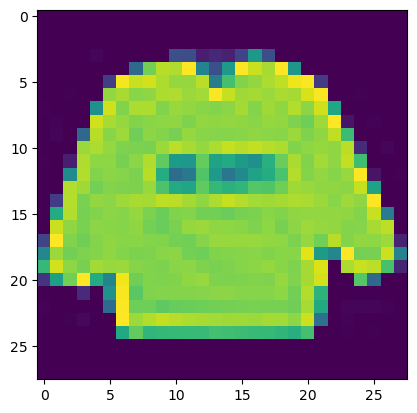

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

2

In [8]:
print(X_train.shape," ",X_test.shape,y_train.shape," ",y_test.shape)

(60000, 28, 28, 1)   (10000, 28, 28, 1) (60000,)   (10000,)


In [9]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=( 28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
     keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [11]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.8915 - accuracy: 0.7442 - val_loss: 0.4032 - val_accuracy: 0.8556
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4637 - accuracy: 0.8287 - val_loss: 0.3327 - val_accuracy: 0.8754
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.4122 - accuracy: 0.8470 - val_loss: 0.3366 - val_accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3857 - accuracy: 0.8583 - val_loss: 0.3156 - val_accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3666 - accuracy: 0.8639 - val_loss: 0.3042 - val_accuracy: 0.8869
Epoch 6/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3532 - accuracy: 0.8683 - val_loss: 0.2953 - val_accuracy: 0.8938
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3525 - accuracy: 0.8701 - val_loss: 0.3004 -

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc,"\ntest loss :",test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.2873 - accuracy: 0.8957
Test accuracy: 0.8956999778747559 
test loss : 0.28729569911956787
